### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r'C:\Users\Rishima\Desktop\Data science\unsupervised\Clusters\online retail customer\OnlineRetail.xlsx')

Check dataset details

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(406829, 8)

In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [10]:
len(df.CustomerID.unique())

4372

Geograhic information

In [11]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

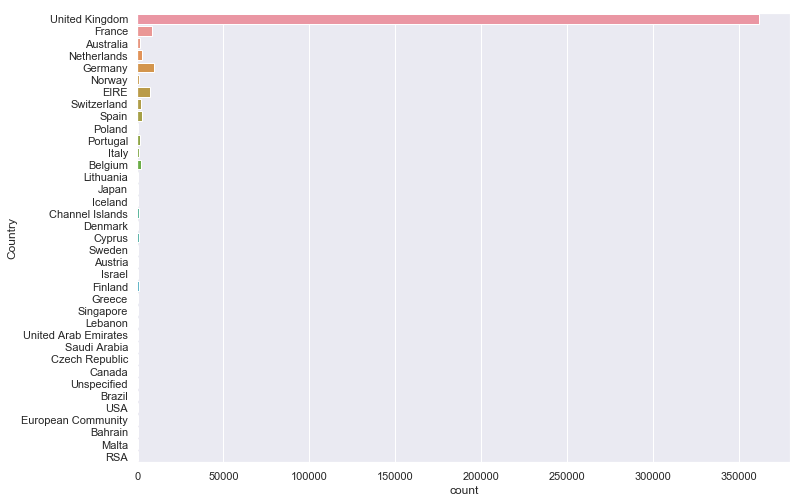

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [14]:
df = df[df.Country.isin(['United Kingdom'])]

In [15]:
df.shape

(361878, 8)

In [16]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [17]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [18]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [19]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [20]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [21]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [22]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [23]:
cust_df.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [24]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [25]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [27]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [28]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [29]:
recency_df.shape

(3921, 2)

In [30]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [31]:
cust_df.shape

(3921, 2)

In [32]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
5,14688.0,7
6,17809.0,16
7,15311.0,0
8,16098.0,87
9,18074.0,373


### Frequency of Invoices

In [33]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [34]:
frequency_df.shape

(3921, 2)

In [35]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
5,12821.0,6
6,12822.0,46
7,12823.0,5
8,12824.0,25
9,12826.0,91


In [36]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [37]:
cust_df.shape

(3921, 3)

In [38]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
5,14688.0,7,327
6,17809.0,16,61
7,15311.0,0,2379
8,16098.0,87,67
9,18074.0,373,13


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [39]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [40]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [41]:
monetary_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
5,12821.0,92.72
6,12822.0,948.88
7,12823.0,1759.50
8,12824.0,397.12
9,12826.0,1474.72


In [42]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [43]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
5,14688.0,7,327,5630.87
6,17809.0,16,61,5411.91
7,15311.0,0,2379,60767.90
8,16098.0,87,67,2005.63
9,18074.0,373,13,489.60


In [44]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
CustomerID    3921 non-null float64
Recency       3921 non-null int64
InvoiceNo     3921 non-null int64
Sales         3921 non-null float64
dtypes: float64(2), int64(2)
memory usage: 153.2 KB


In [45]:
cust_df['CustomerID'] = cust_df['CustomerID'].astype('object')

In [46]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
CustomerID    3921 non-null object
Recency       3921 non-null int64
InvoiceNo     3921 non-null int64
Sales         3921 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 153.2+ KB


In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_df = pd.DataFrame(ss.fit_transform(cust_df), columns=cust_df.columns)

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
import seaborn as sns
from sklearn.cluster import KMeans

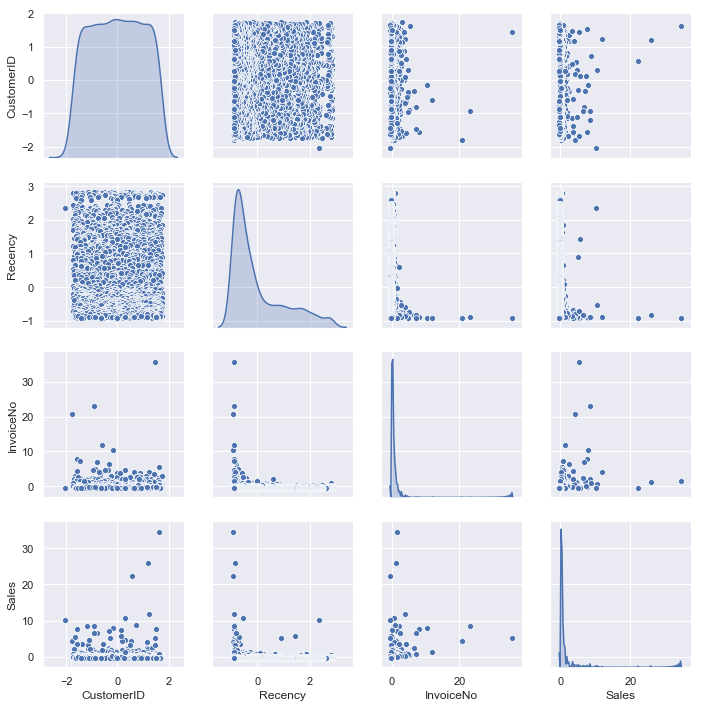

In [49]:
sns.pairplot(scaled_df,diag_kind='kde')

In [50]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(scaled_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,15684.000000
1,2,12426.752300
2,3,9382.337765
3,4,7113.904158
4,5,5657.366913
5,6,4568.091599
6,7,3932.040203
7,8,3315.939201
8,9,2921.835487
9,10,2682.848145


In [51]:
errors = clusters_df.cluster_errors
for i in range(8):
    print(errors[i+1]-errors[i])

-3257.2476998735874
-3044.414535615655
-2268.433606042009
-1456.5372457891235
-1089.275313451607
-636.0513961909237
-616.1010018037696
-394.10371455126415


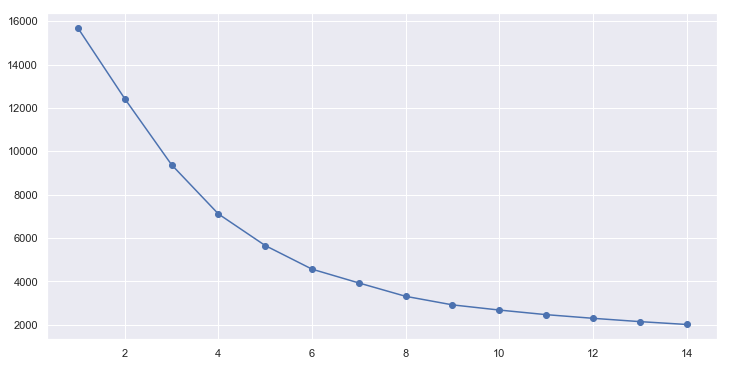

In [52]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3624314688642234


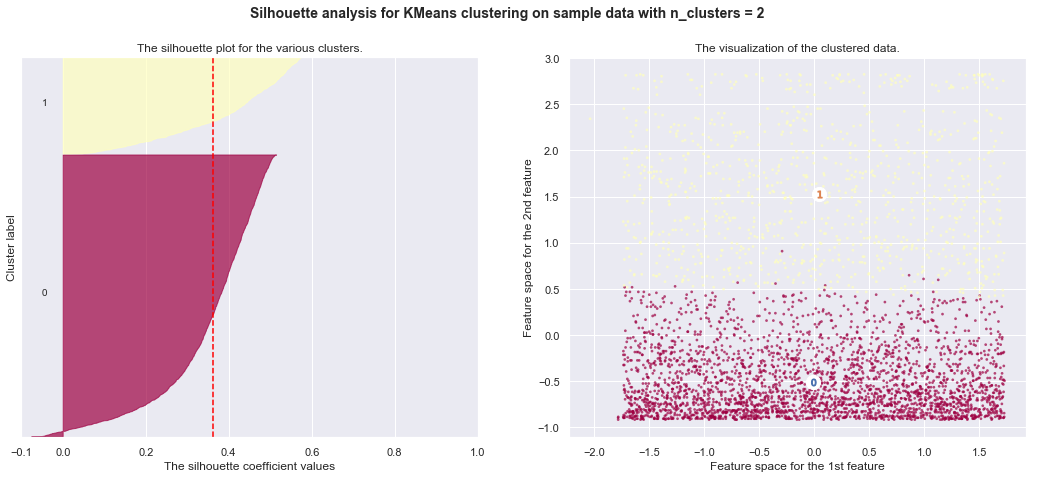

For n_clusters = 3 The average silhouette_score is : 0.3804042692948134


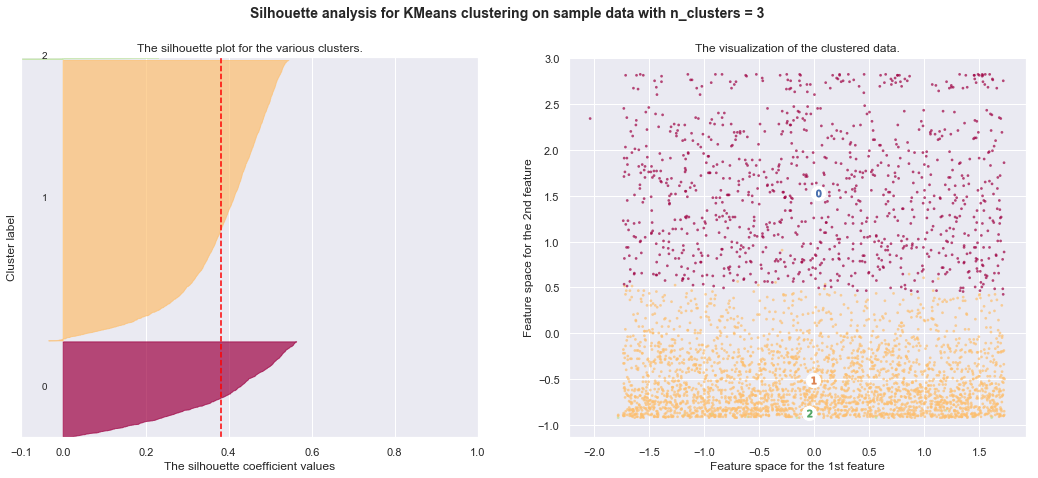

For n_clusters = 4 The average silhouette_score is : 0.39144565497166844


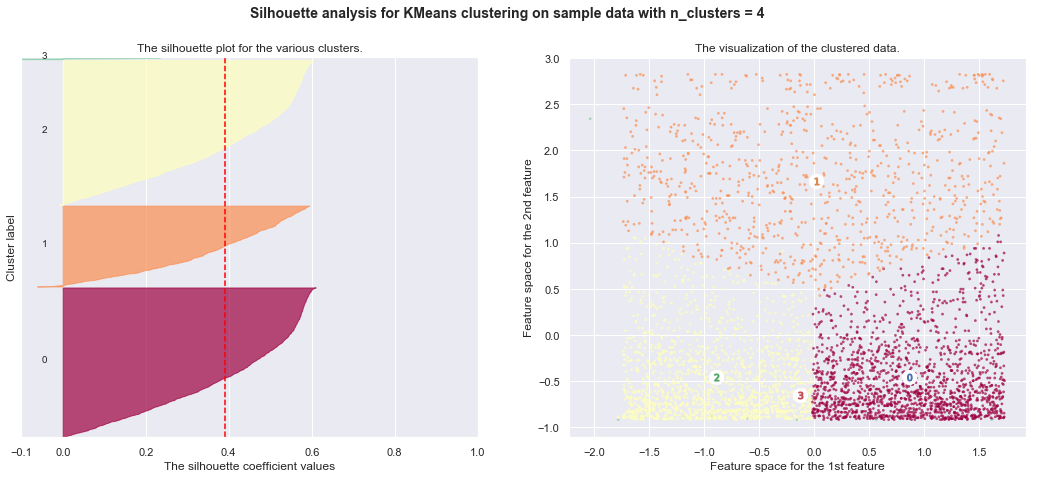

For n_clusters = 5 The average silhouette_score is : 0.3932331174441346


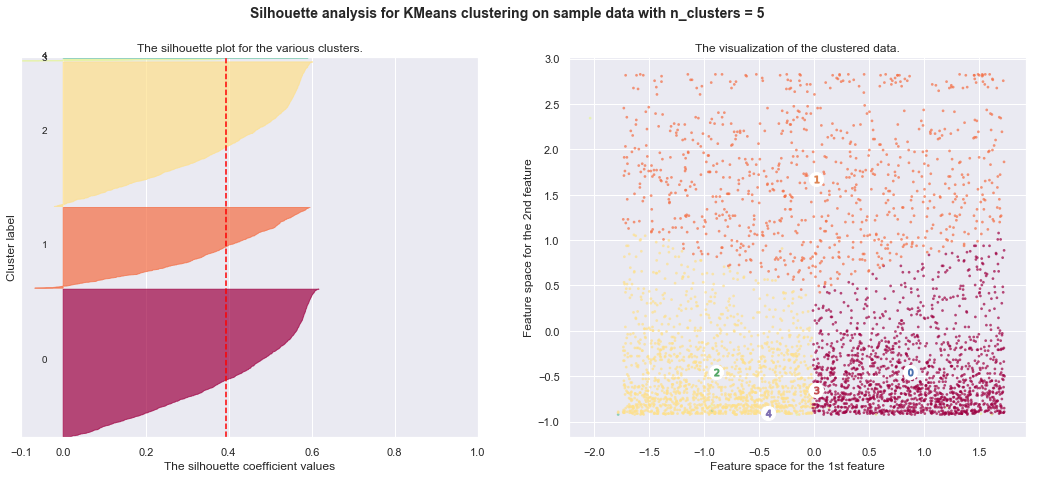

For n_clusters = 6 The average silhouette_score is : 0.402402535762099


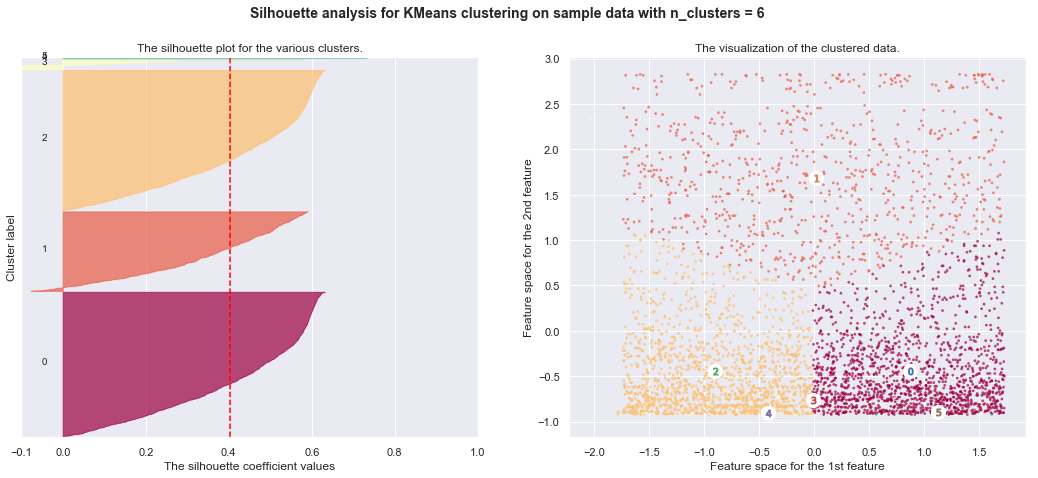

For n_clusters = 7 The average silhouette_score is : 0.3974963471502669


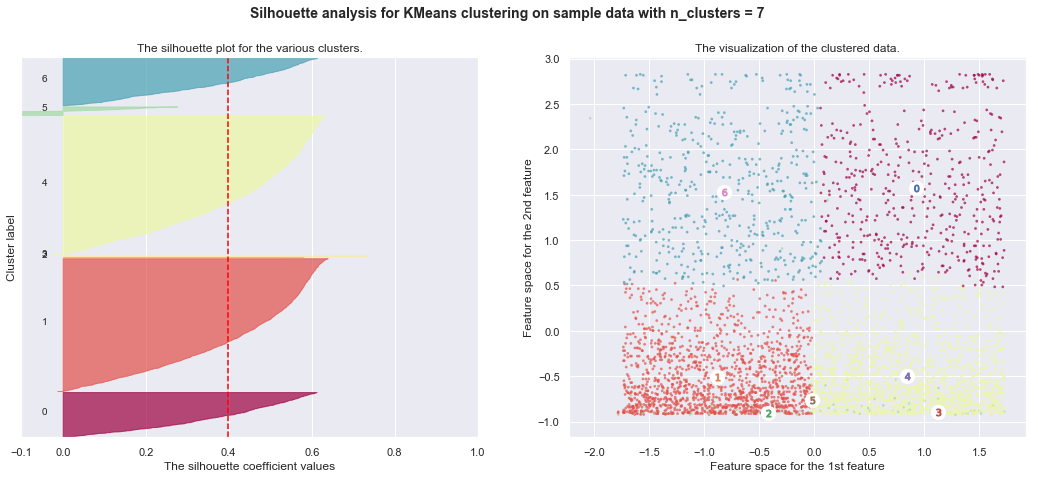

For n_clusters = 8 The average silhouette_score is : 0.4052358410097608


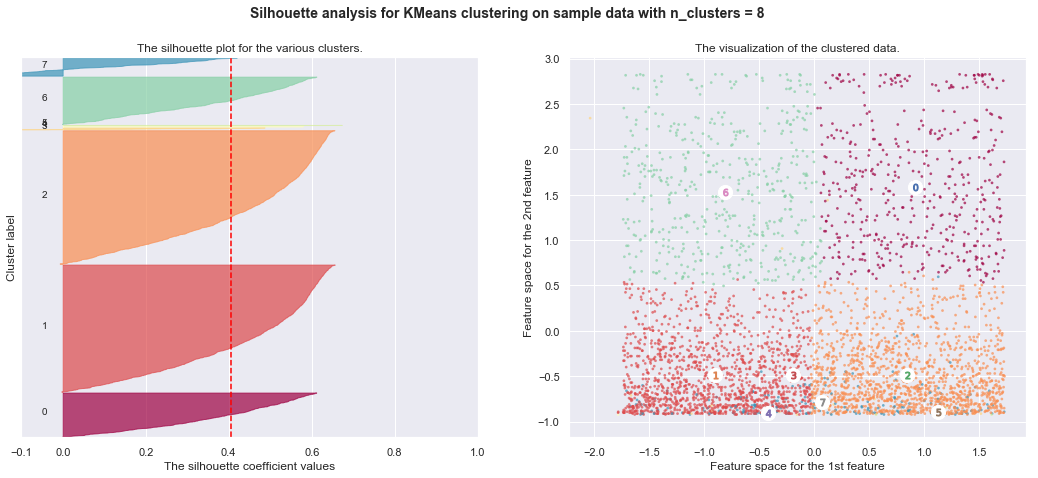

For n_clusters = 9 The average silhouette_score is : 0.3400398708590784


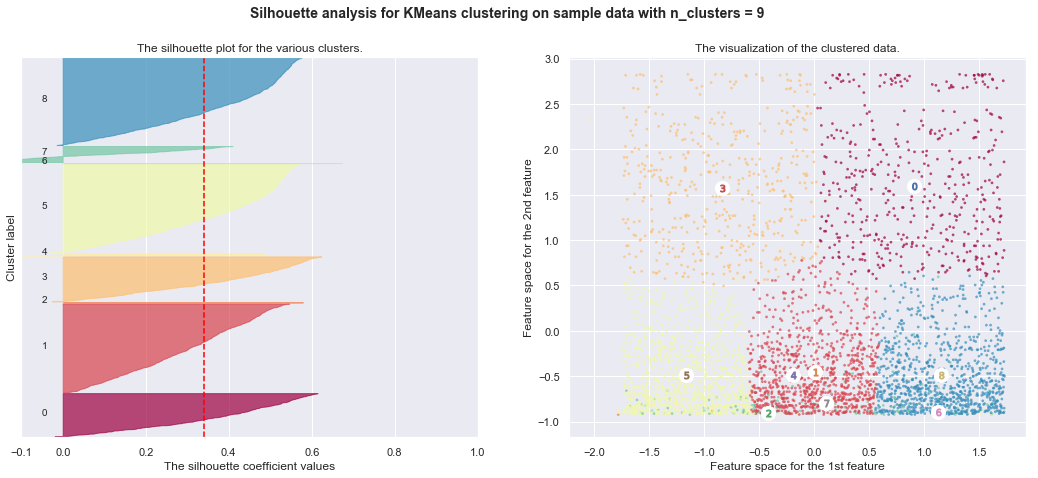

For n_clusters = 10 The average silhouette_score is : 0.34304506924250694


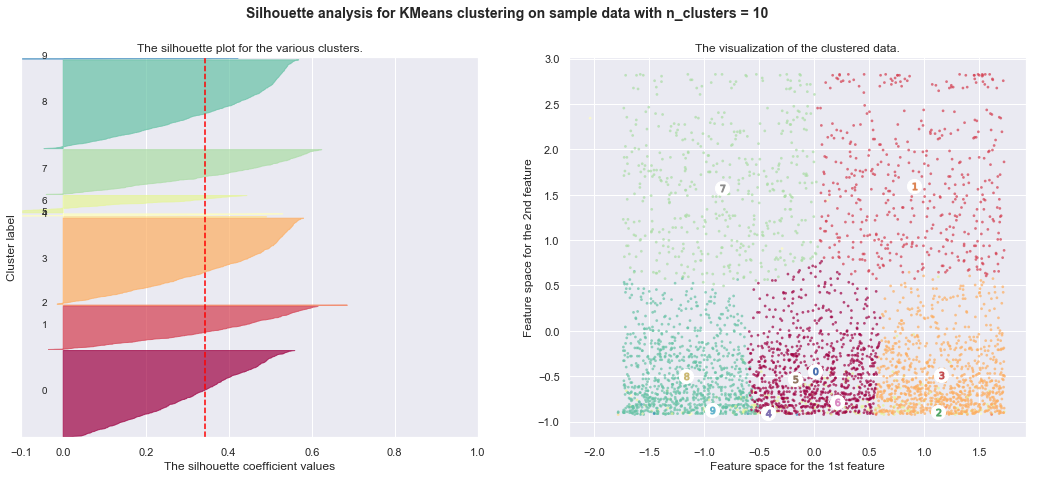

For n_clusters = 11 The average silhouette_score is : 0.33840456158819676


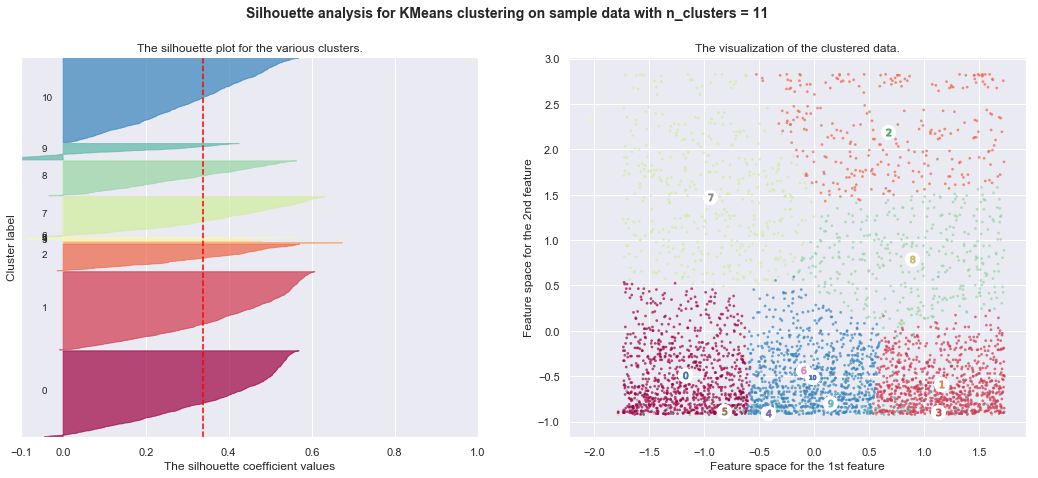

For n_clusters = 12 The average silhouette_score is : 0.3430610616546494


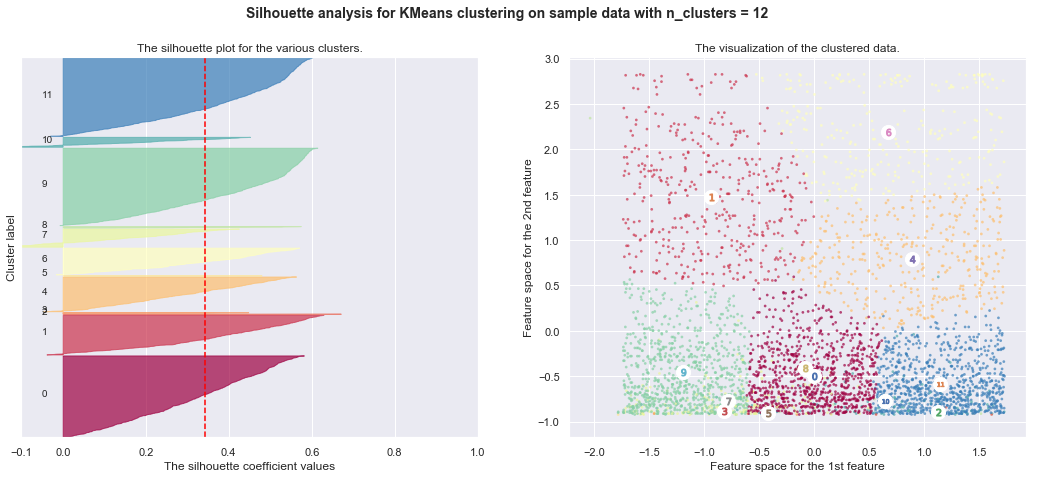

For n_clusters = 13 The average silhouette_score is : 0.33577433218751385


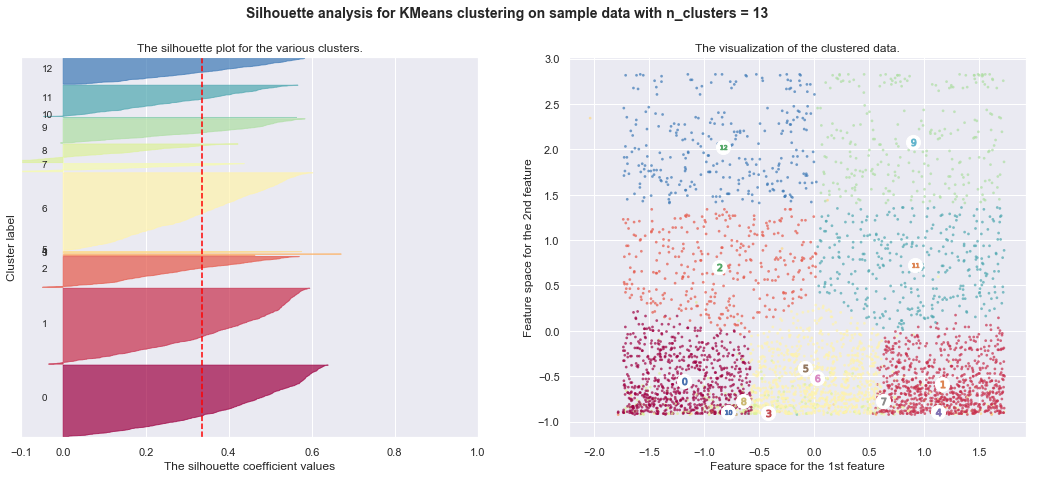

In [53]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=scaled_df

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [54]:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans = kmeans.fit(scaled_df)
labels = kmeans.predict(scaled_df)

In [55]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 8.59544684e-01 -4.59569574e-01  4.06552323e-02 -2.92060947e-02]
 [ 1.54871919e-02  1.66952642e+00 -2.90346200e-01 -1.85266329e-01]
 [-9.03230783e-01 -4.57721989e-01  4.28727808e-02  1.22002502e-03]
 [-4.22721053e-01 -9.04937329e-01  2.64545397e+01  5.98337712e+00]
 [ 1.71221086e-02 -6.46352028e-01  2.59983683e+00  1.21784249e+01]]


In [56]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [57]:
cust_labeled = scaled_df.join(df_labels)

In [58]:
cust_labeled.head()

,CustomerID,Recency,InvoiceNo,Sales,labels
0,1.451539,2.816413,0.948847,0.471503,1
1,-1.594847,-0.610177,0.374843,0.183617,2
2,-1.150226,0.032937,-0.286410,-0.122399,2
3,-0.292696,2.424516,-0.401211,-0.132056,1
4,-0.171551,-0.670469,0.057992,0.374870,2


In [59]:
kmeans.inertia_

5657.491007608398

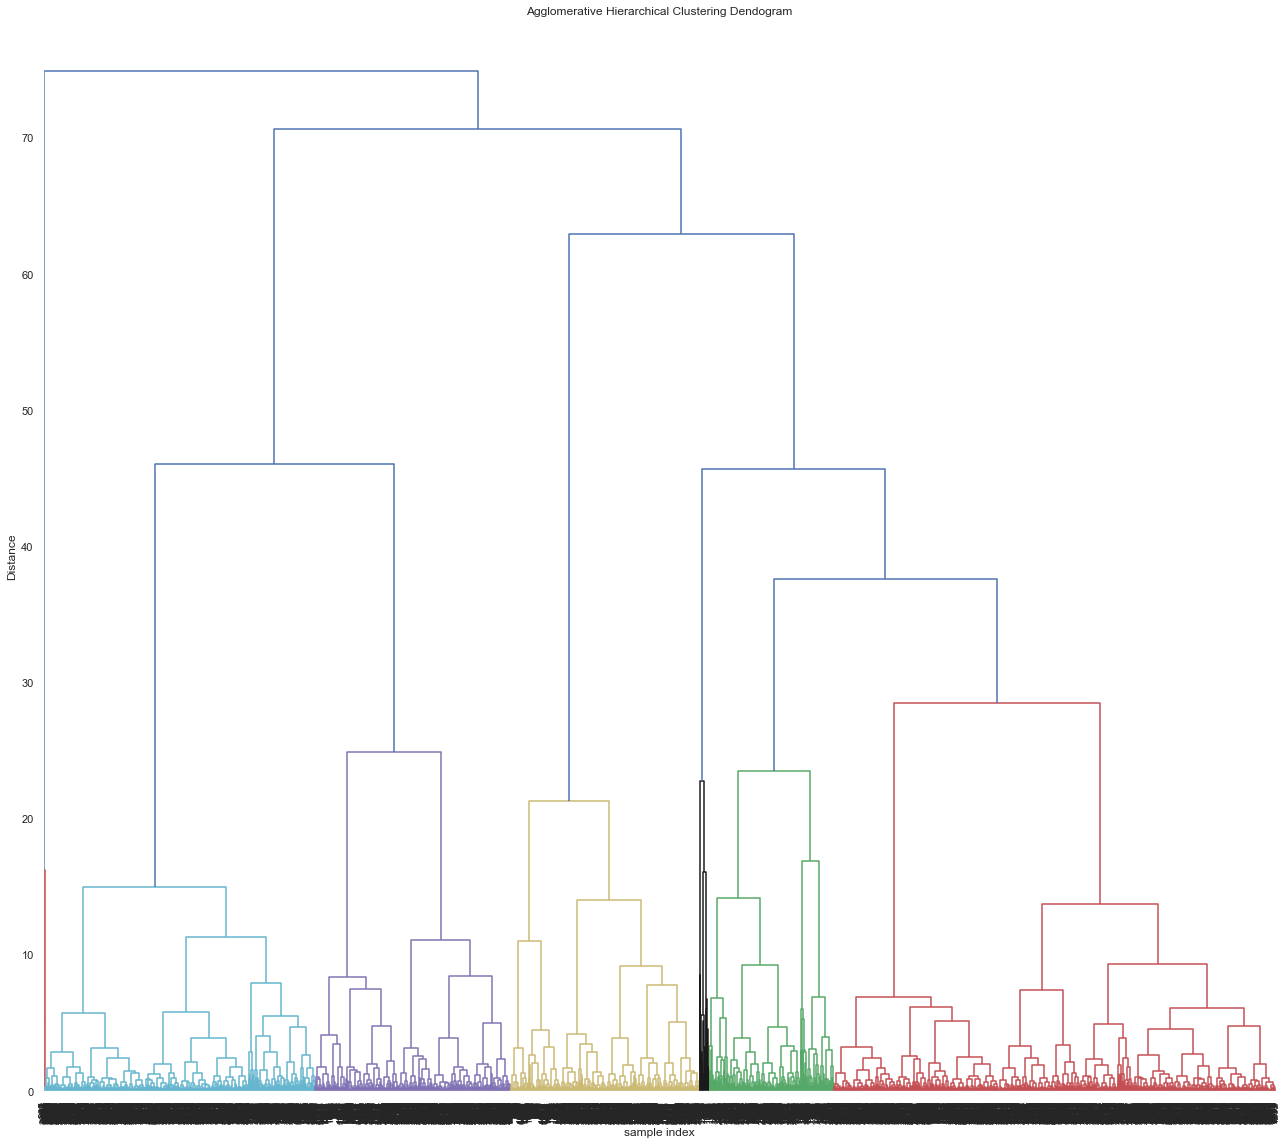

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(scaled_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=20,color_threshold=30,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [61]:
from sklearn.cluster import AgglomerativeClustering 

In [62]:
model2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [63]:
model2.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [64]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

0    1833
5     860
1     623
3     599
4       3
2       3
Name: 0, dtype: int64

In [65]:
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['agc_labels']))

AGC_labels['agc_labels'] = AGC_labels['agc_labels'].astype('category')

In [66]:
cust_labeled = scaled_df.join(AGC_labels)

In [67]:
AGC_clusters = cust_labeled.groupby(['agc_labels'])

In [68]:
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)
Df3=AGC_clusters.get_group(3)
Df4=AGC_clusters.get_group(4)
Df5=AGC_clusters.get_group(5)

In [69]:
(Df0.shape,Df1.shape,Df2.shape,Df3.shape,Df4.shape,Df5.shape)

((1833, 5), (623, 5), (3, 5), (599, 5), (3, 5), (860, 5))

In [70]:
Df0.columns

Index(['CustomerID', 'Recency', 'InvoiceNo', 'Sales', 'agc_labels'], dtype='object')

In [71]:
C0=np.array([Df0['CustomerID'].mean(),Df0['Recency'].mean(),Df0['InvoiceNo'].mean(), Df0['Sales'].mean()])
C1=np.array([Df1['CustomerID'].mean(),Df1['Recency'].mean(),Df1['InvoiceNo'].mean(), Df1['Sales'].mean()])
C2=np.array([Df2['CustomerID'].mean(),Df2['Recency'].mean(),Df2['InvoiceNo'].mean(), Df2['Sales'].mean()])
C3=np.array([Df3['CustomerID'].mean(),Df3['Recency'].mean(),Df3['InvoiceNo'].mean(), Df3['Sales'].mean()])
C4=np.array([Df4['CustomerID'].mean(),Df4['Recency'].mean(),Df4['InvoiceNo'].mean(), Df4['Sales'].mean()])
C5=np.array([Df5['CustomerID'].mean(),Df5['Recency'].mean(),Df5['InvoiceNo'].mean(), Df5['Sales'].mean()])


In [72]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
AGC_I3=0
AGC_I4=0
AGC_I5=0
for i in np.arange(Df0.shape[0]):
    AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
    AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
    AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)
for i in np.arange(Df3.shape[0]):
    AGC_I3=AGC_I3+np.sum((Df3.iloc[i,:-1]-C3)**2)
for i in np.arange(Df4.shape[0]):  
    AGC_I4=AGC_I4+np.sum((Df4.iloc[i,:-1]-C4)**2)
for i in np.arange(Df5.shape[0]):
    AGC_I5=AGC_I5+np.sum((Df5.iloc[i,:-1]-C5)**2)

In [73]:
AGC_I0+AGC_I1+AGC_I2+AGC_I3+AGC_I4+AGC_I5

5657.471683101774